In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from core.data import load_from_kaggle


c:\Users\Admin\Git\loan-default-prediction\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset_link = "yasserh/loan-default-dataset" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

100%|██████████| 4.89M/4.89M [00:01<00:00, 3.29MB/s]

Extracting files...


Loading dataset from C:\Users\Admin\.cache\kagglehub\datasets\yasserh\loan-default-dataset\versions\1 to ../data/raw\loan-default-dataset
Moving file: C:\Users\Admin\.cache\kagglehub\datasets\yasserh\loan-default-dataset\versions\1\Loan_Default.csv to c:\Users\Admin\Git\loan-default-prediction\notebooks\../data/raw\loan-default-dataset
Files moved to '../data/raw\loan-default-dataset' directory.


In [4]:
files

['Loan_Default.csv']

In [6]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [7]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(148670, 34)

'Description'

,count,mean,std,min,25%,50%,75%,max
ID,148670.0,99224.50,42917.48,24890.00,62057.25,99224.50,136391.75,173559.00
year,148670.0,2019.00,0.00,2019.00,2019.00,2019.00,2019.00,2019.00
loan_amount,148670.0,331117.74,183909.31,16500.00,196500.00,296500.00,436500.00,3576500.00
rate_of_interest,112231.0,4.05,0.56,0.00,3.62,3.99,4.38,8.00
Interest_rate_spread,112031.0,0.44,0.51,-3.64,0.08,0.39,0.78,3.36
Upfront_charges,109028.0,3225.00,3251.12,0.00,581.49,2596.45,4812.50,60000.00
term,148629.0,335.14,58.41,96.00,360.00,360.00,360.00,360.00
property_value,133572.0,497893.47,359935.32,8000.00,268000.00,418000.00,628000.00,16508000.00
income,139520.0,6957.34,6496.59,0.00,3720.00,5760.00,8520.00,578580.00
Credit_Score,148670.0,699.79,115.88,500.00,599.00,699.00,800.00,900.00


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
ID,int64,0,148670,"[63201, 63685, 102899]"
year,int64,0,1,"[2019, 2019, 2019]"
loan_limit,object,3344,2,"[cf, cf, cf]"
Gender,object,0,4,"[Sex Not Available, Sex Not Available, Joint]"
approv_in_adv,object,908,2,"[nopre, pre, nopre]"
loan_type,object,0,3,"[type3, type1, type1]"
loan_purpose,object,134,4,"[p4, p4, p3]"
Credit_Worthiness,object,0,2,"[l1, l1, l1]"
open_credit,object,0,2,"[nopc, nopc, nopc]"
business_or_commercial,object,0,2,"[b/c, nob/c, nob/c]"


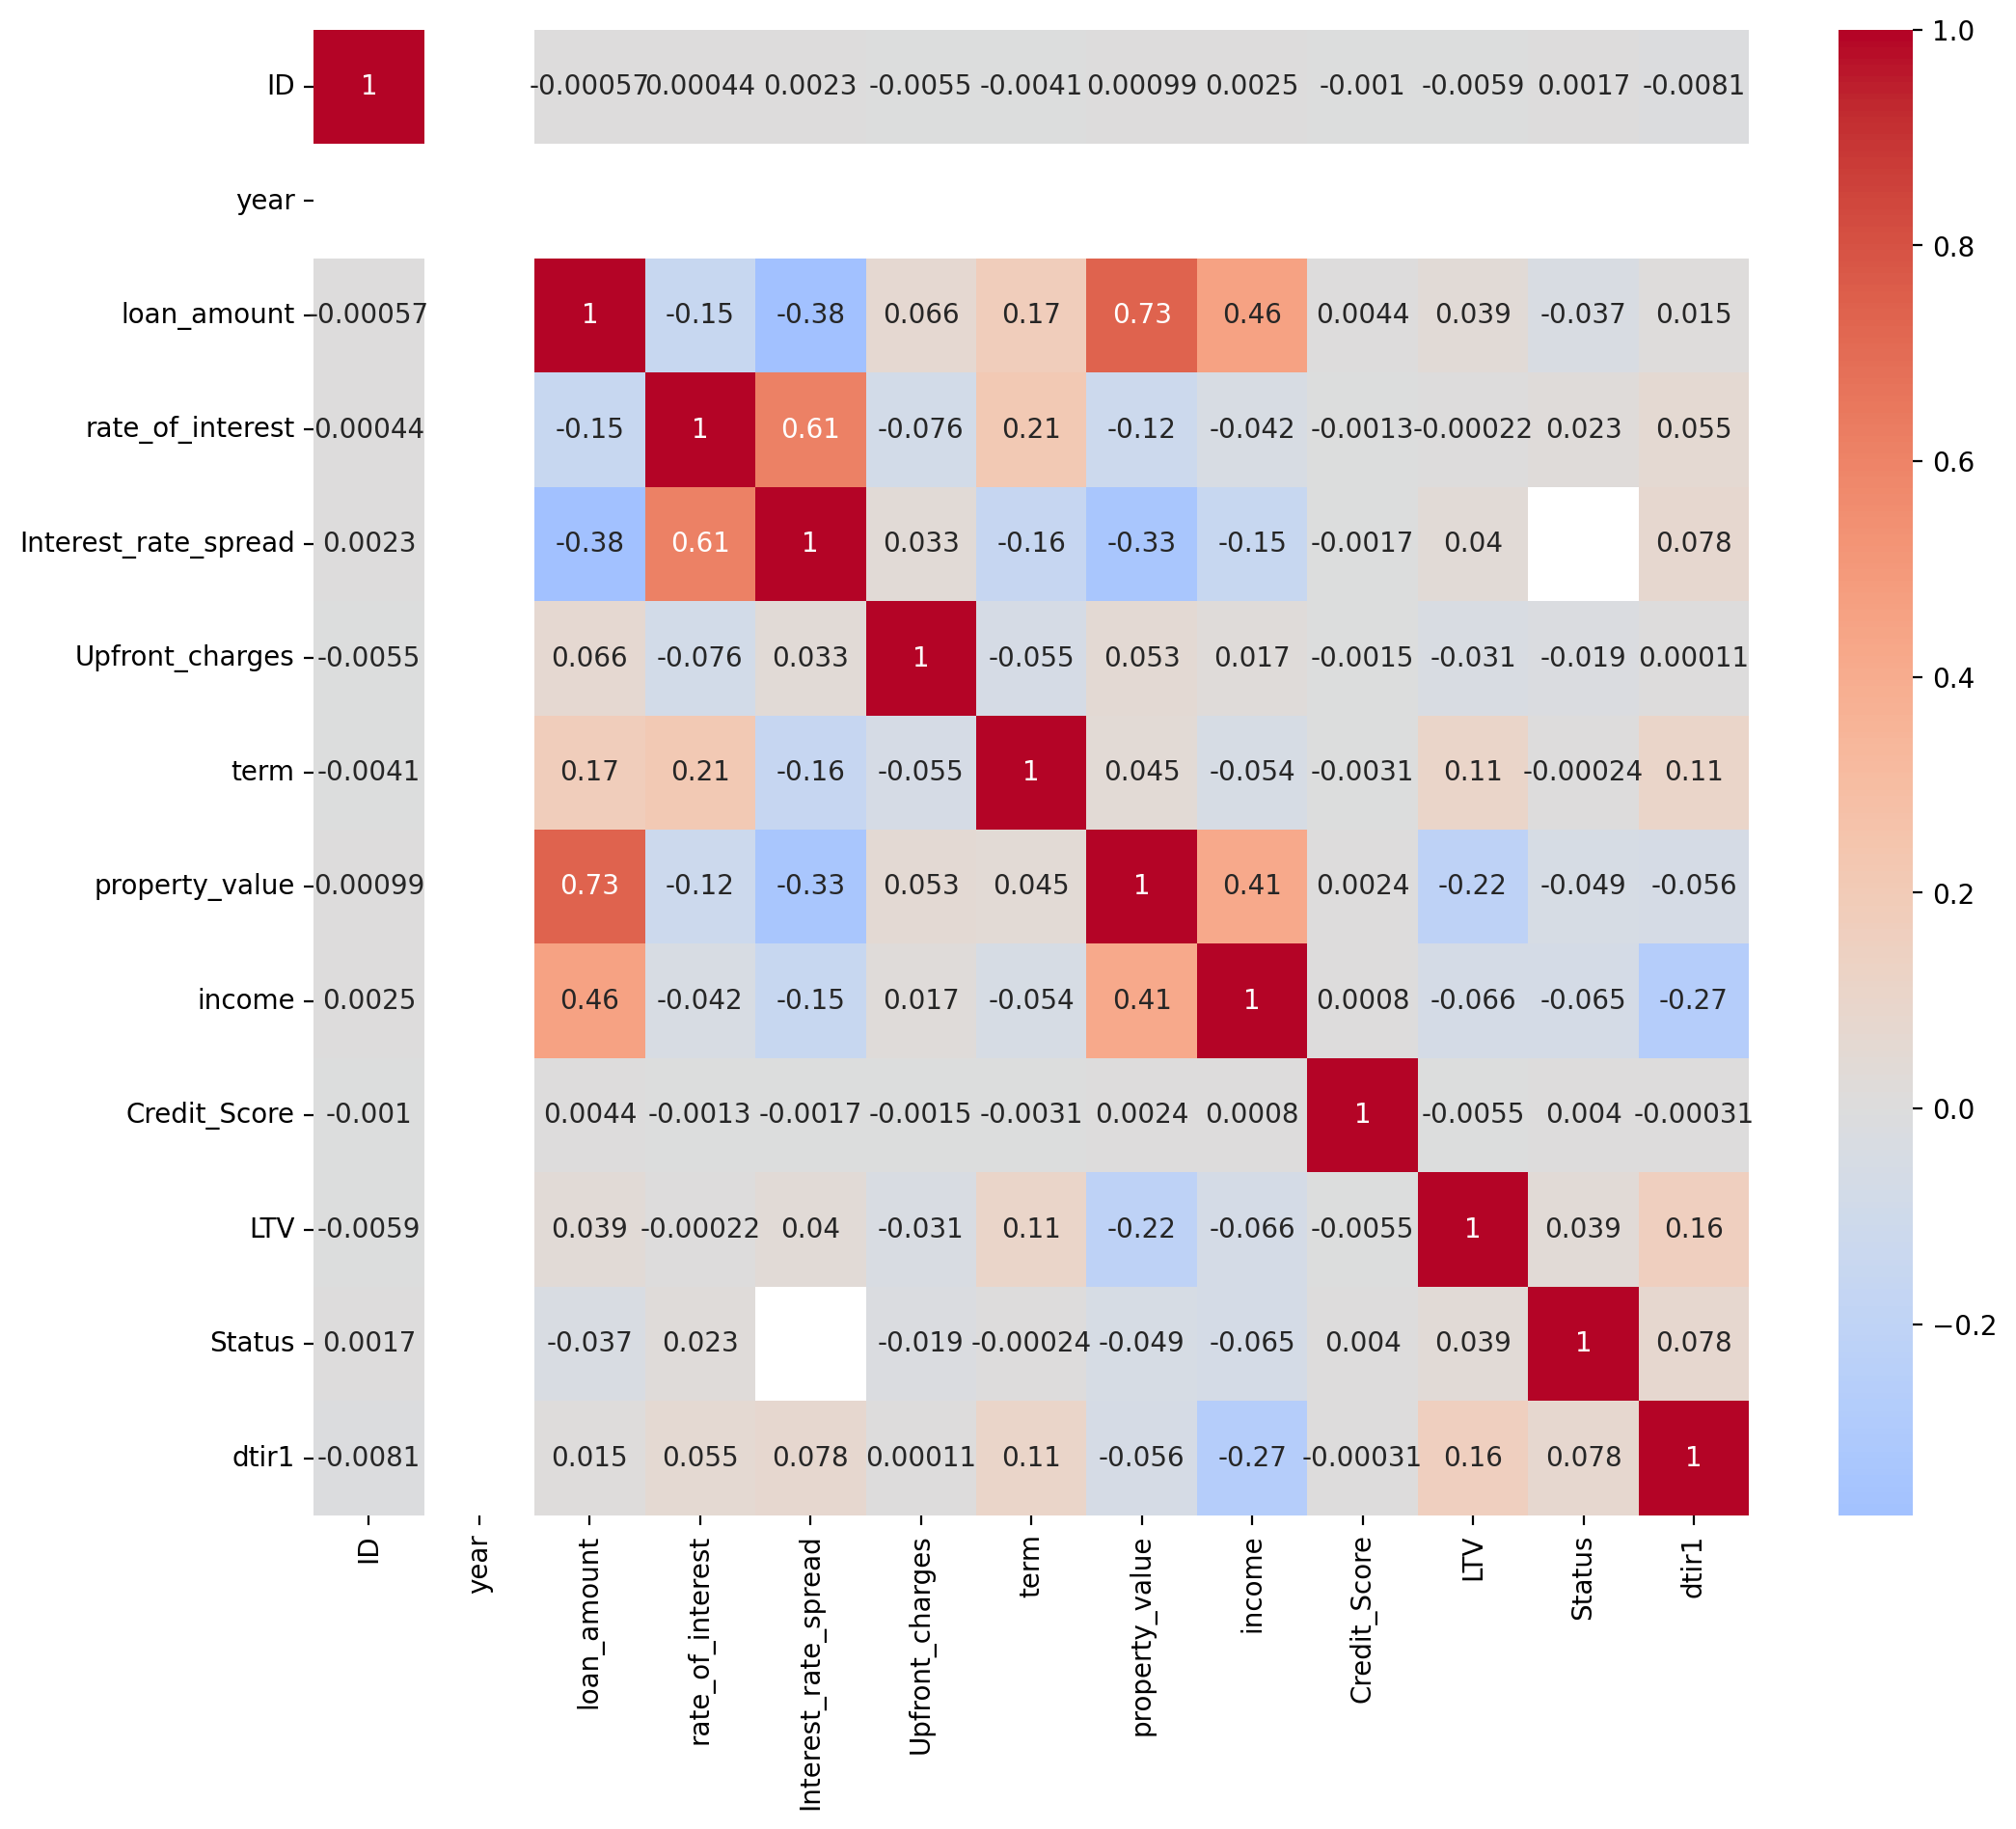

In [8]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);